In [68]:

import matplotlib.pyplot as plt
from datetime import datetime
from skyfield.api import utc,Topos,load

In [69]:
station_data = load.tle('https://celestrak.com/NORAD/elements/stations.txt')
iss = station_data['ISS (ZARYA)']
print(iss)

ISS (ZARYA) catalog #25544 epoch 2025-03-15 16:38:38 UTC


In [70]:
ts = load.timescale()  # Load time scale
minutes = range(60 * 2)  # 2-hour range
time_range=[]
for i in minutes:
    time_range.append(ts.utc(2024, 3, 21, 2,i))

In [87]:
altitudes = []
azimuths = []

for t in time_range:
    # Calculate satellite position at each time step
    port_hedland = Topos(latitude='20.3123 S', longitude='118.64498 E')
    orbit = (iss - port_hedland).at(t)
    altitude, azimuth, distance = orbit.altaz()
    
    # Append the altitude and azimuth values to the lists
    altitudes.append(altitude.degrees)
    azimuths.append(azimuth.degrees)
    

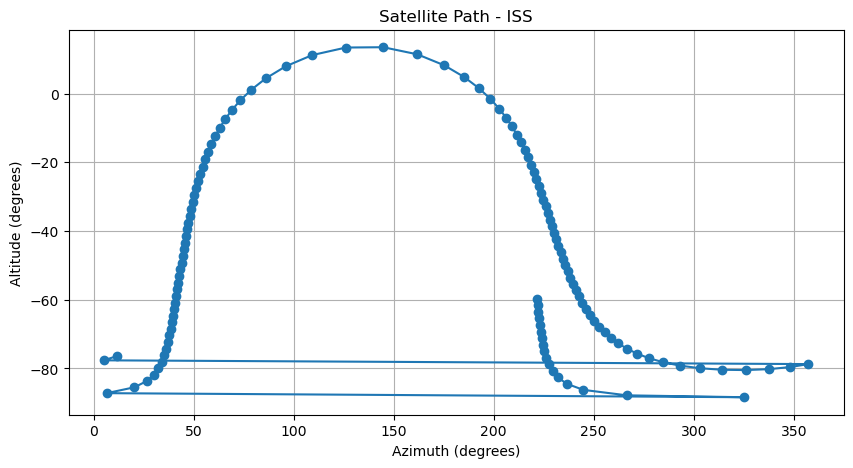

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(azimuths, altitudes, marker='o', linestyle='-')
plt.title("Satellite Path - ISS")
plt.xlabel("Azimuth (degrees)")
plt.ylabel("Altitude (degrees)")
plt.grid(True)
plt.show()